In [2]:
import pandas as pd

In [111]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [5]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,"4,423,698.05",New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,"1,814,542.62",New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,"6,755.31",Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,"3,293,055.08",New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [15]:
df.value_counts(df['Company Name'])

Company Name
FEDERAL EXPRESS                            3
SILVERCUP Services LLC                     2
Albert Einstein College of Medicine R&D    2
MEDITERRANEAN GYRO PRODUCTS                2
Spin Master, Inc.                          2
                                          ..
EMG Media, Inc.                            1
EDISON PRICE, INC.                         1
EASTERN CONCEPTS, INC.                     1
E. J. York, Inc.                           1
gCreate LLC                                1
Length: 439, dtype: int64

In [12]:
df['Company Name'].nunique

<bound method IndexOpsMixin.nunique of 0                                1 State Street
1                                100 Church LLC
2                          100 Wall Investments
3                   1-10 Bush Terminal Owner LP
4      120 Broadway Acquisitions JV, LLC (Ldmk)
                         ...                   
445                           WONTON FOOD, INC.
446                                  Wood Works
447             WorldWide Plumbing Supply, Inc.
448                           WUD Furniture LLC
449                         Wurtec Incorporated
Name: Company Name, Length: 450, dtype: object>

In [19]:
df_Queens = df[(df['City'] == 'Queens')]

In [18]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [32]:
df_Queens['Job created'].sum(skipna = True)


90.0

In [37]:
company_email = df.dropna(subset = ['company email'])

In [52]:
domains = company_email['company email'].str.split('@')

In [79]:
domains_list = domains.str[1].values

In [82]:
len(set(domains_list))

357

In [118]:
vc = df.NTA.value_counts()

In [122]:
df_NTA_above5 = df[df.NTA.isin(vc.index[vc.gt(4)])]

In [123]:
total_jobs = df_NTA_above5.groupby(['NTA'])['Job created'].sum()

In [124]:
total_jobs

NTA
Battery Park City-Lower Manhattan                    0.0
Bushwick South                                      10.0
Carroll Gardens-Columbia Street-Red Hook             0.0
College Point                                        2.0
Crown Heights North                                  0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     0.0
East New York                                       15.0
East Williamsburg                                    0.0
Greenpoint                                           0.0
Hunters Point-Sunnyside-West Maspeth                 0.0
Hunts Point                                         12.0
Manhattanville                                       0.0
Maspeth                                             10.0
Mott Haven-Port Morris                              10.0
Queensbridge-Ravenswood-Long Island City             0.0
SoHo-TriBeCa-Civic Center-Little Italy               0.0
Springfield Gardens South-Brookville                 0.0
Steinway                   

In [133]:
df_NTA_above5['Total Savings'] = df_NTA_above5['Total Savings'].str.replace(',', '').astype(float)

C:\Users\galen\AppData\Local\Temp\ipykernel_17424\4224248558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NTA_above5['Total Savings'] = df_NTA_above5['Total Savings'].str.replace(',', '').astype(float)


In [134]:
total_savings = df_NTA_above5.groupby(['NTA'])['Total Savings'].sum()

In [135]:
total_savings

NTA
Battery Park City-Lower Manhattan                   4229017.17
Bushwick South                                       261404.55
Carroll Gardens-Columbia Street-Red Hook             267711.29
College Point                                        120115.61
Crown Heights North                                   36326.69
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     599503.40
East New York                                        435897.84
East Williamsburg                                    153896.89
Greenpoint                                           136551.09
Hunters Point-Sunnyside-West Maspeth                1794854.92
Hunts Point                                          510198.21
Manhattanville                                        24848.00
Maspeth                                               59924.55
Mott Haven-Port Morris                               249815.13
Queensbridge-Ravenswood-Long Island City             989292.33
SoHo-TriBeCa-Civic Center-Little Italy             

In [136]:
total_savings.to_csv('total_savings.csv')

In [137]:
total_jobs.to_csv('total_jobs.csv')

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='Total Savings', ylabel='Job created'>

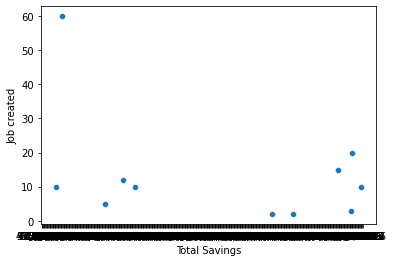

In [142]:
sns.scatterplot(x='Total Savings', y='Job created', data=df)

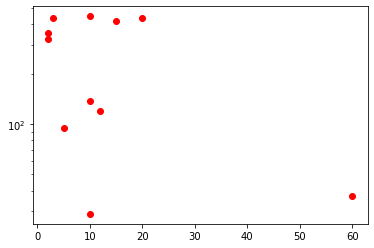

In [146]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['Job created'] ,df['Total Savings'] , c='red')
ax.set_yscale('log')
#ax.set_xscale('log')

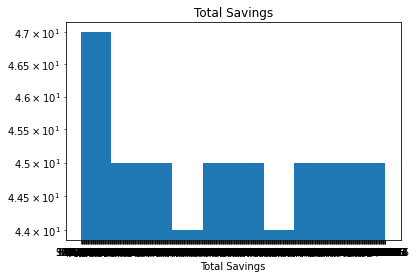

In [149]:
plt.hist(df['Total Savings'], log = True)

# Add some formatting to the plot:
plt.xlabel('Total Savings')
plt.title('Total Savings');

In [189]:
df_line = df[['Effective Date','Job created']].dropna()

In [169]:
df_line.head()

,Effective Date,Job created
29,2004-03-05,10.0
37,2007-06-28,60.0
95,2007-11-06,5.0
120,2005-02-03,12.0
137,2006-03-01,10.0


In [168]:
df_line.dtypes

Effective Date    datetime64[ns]
Job created              float64
dtype: object

In [190]:
df_line['Effective Date'] = pd.to_datetime(df['Effective Date'])

In [191]:
df_line = df_line.sort_values(by = ['Effective Date'])

In [172]:
df_line.head(15)

,Effective Date,Job created
414,1993-02-05,15.0
29,2004-03-05,10.0
120,2005-02-03,12.0
137,2006-03-01,10.0
353,2007-04-10,2.0
324,2007-05-02,2.0
432,2007-06-08,3.0
37,2007-06-28,60.0
433,2007-07-02,20.0
95,2007-11-06,5.0


In [192]:
df_line['month_year'] = pd.to_datetime(df_line['Effective Date']).dt.to_period('M')

In [193]:
df_line = df_line.drop('Effective Date', axis = 1)

In [194]:
df_line = df_line.reset_index()

In [195]:
df_line = df_line.drop('index', axis = 1)

In [196]:
df_line.head()

,Job created,month_year
0,15.0,1993-02
1,10.0,2004-03
2,12.0,2005-02
3,10.0,2006-03
4,2.0,2007-04


In [205]:
df_line_groupby = df_line.groupby('month_year').sum()

<AxesSubplot:xlabel='month_year'>

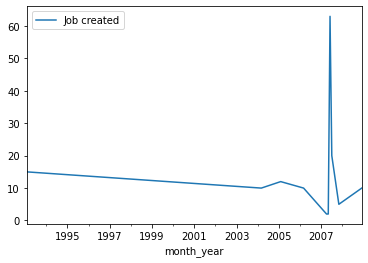

In [208]:
df_line_groupby['Job created'].plot(kind='line', legend=True)